# Just hit "Run", and welcome to our 1 x 1 x 1 cm miniture room! 

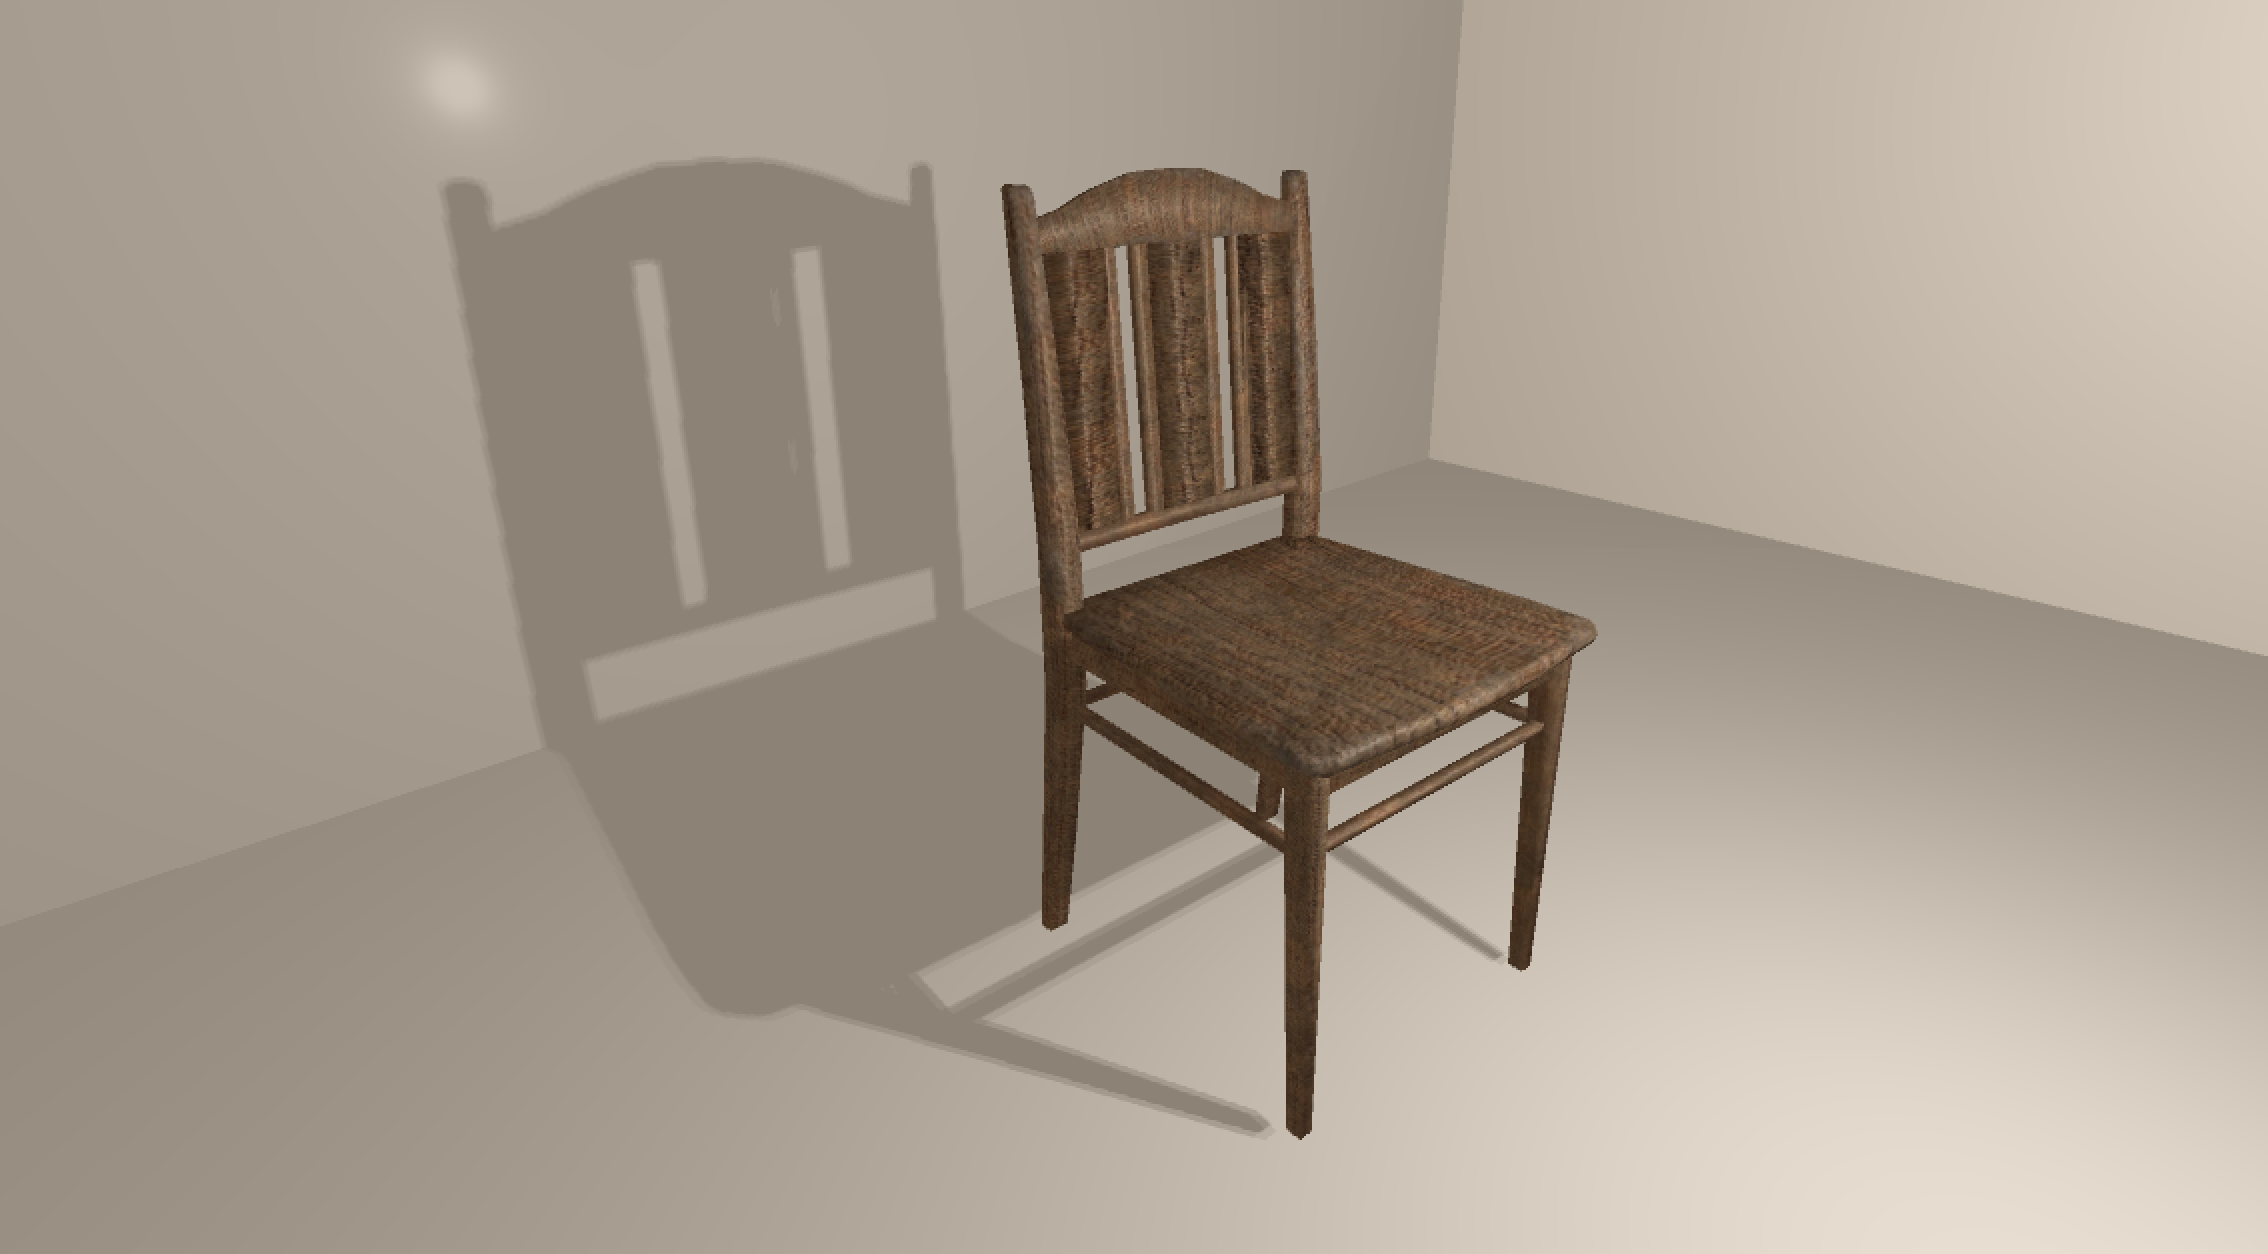

In [50]:
from IPython.display import Image
Image("img/1.0.png")

# *But that's not an armchair*

# Slow down, we are switching the light too fast. Try again to buff the emission. By the way that's a tiny chair with 3 mm width

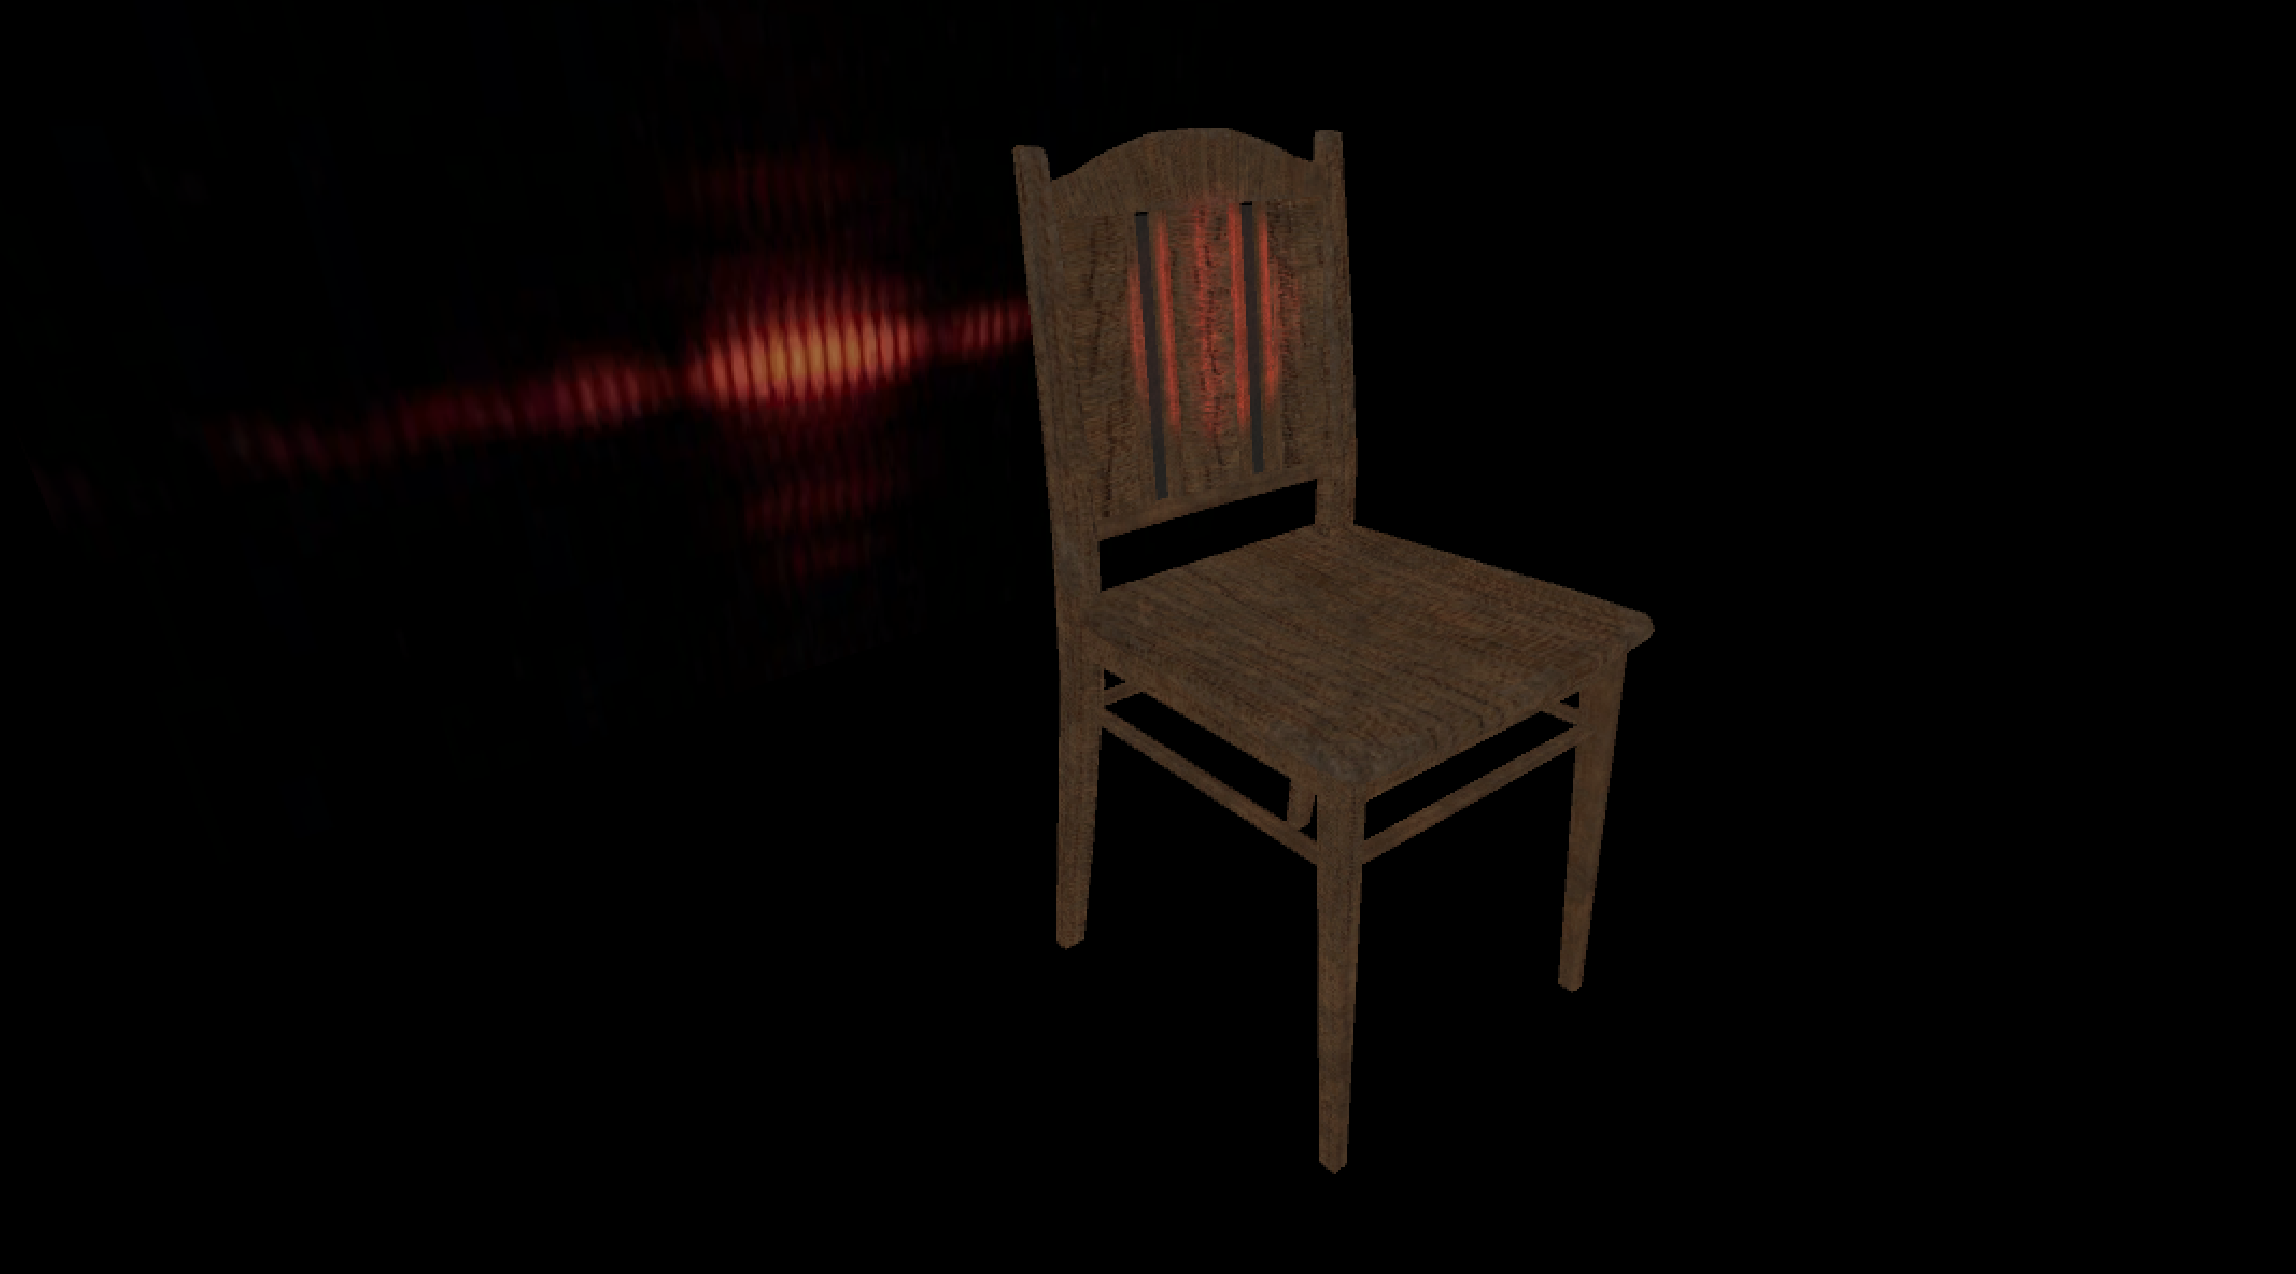

In [51]:
Image("img/1.1.png")

# *Okay two light bars are gone and replaced by... more light bars, but how?*

# Good observation! Let's check out how waves interfere each other!

In [ ]:
# We will use numpy library for numeric calculation and matplotlib for data visualisation 
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Setting up our space in a graph from an areal view 
xmin, xmax = 0, 10
ymin, ymax = -5, 5

xpoints, ypoints = 200, 200

x = np.linspace(xmin, xmax, xpoints)
y = np.linspace(ymin, ymax, ypoints)

xx, yy = np.meshgrid(x, y, sparse = False)

points = np.concatenate([xx.reshape(-1, 1), yy.reshape(-1, 1)], axis=-1)
points

In [ ]:
source1=np.array([0, 0.5])
source2=np.array([0, -0.5])

In [8]:
points1 = points - source1
points2 = points - source2

A1= 4
A2= 4
k = 20

wave1 = A1*(np.sin( k * (points1[:, 0]**2 + points1[:, 1]**2)**0.5))
wave2 = A2*(np.sin( k * (points2[:, 0]**2 + points2[:, 1]**2)**0.5))

# superposition of two waves

A = (wave1 + wave2)
intensity = A**2

#  constructive, destructive

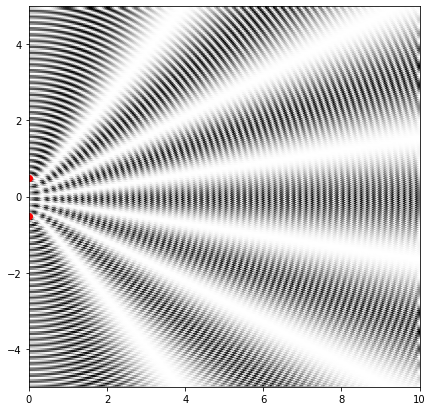

In [9]:
plt.figure(figsize=(7, 7))
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.scatter(points[:, 0], points[:, 1], c = intensity, cmap=plt.cm.binary)

plt.scatter(*source1, c='red')
plt.scatter(*source2, c='red')

In [10]:
interval = 0.5
radius = np.linspace(xmin, xmax, int((xmax-xmin)/interval))
velocity = 0.2

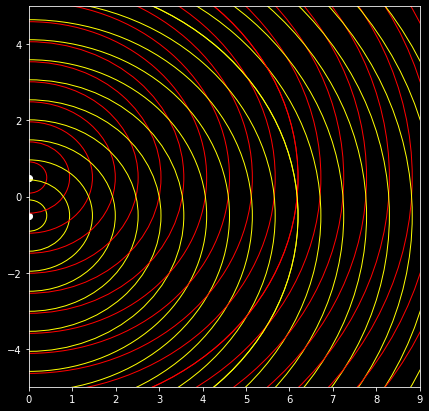

In [ ]:
from IPython.display import display, clear_output
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(7, 7))
plt.xlim(xmin, xmax-1)
plt.ylim(ymin, ymax)

cs1, cs2 = [], []

for r in radius:
  circle1=plt.Circle(source1, r, facecolor=(1, 0, 0, 0), edgecolor='red')
  cs1.append(ax.add_artist(circle1))

  circle2=plt.Circle(source2, r, facecolor=(1, 0, 0, 0), edgecolor='yellow')
  cs2.append(ax.add_artist(circle2))

plt.scatter(*source1, c='white')
plt.scatter(*source2, c='white')

for i in range(10000):
  [c.set_radius(radius[i]) for i, c in enumerate(cs1)]
  [c.set_radius(radius[i]) for i, c in enumerate(cs2)]
  radius = (radius + velocity)%(xmax-xmin)
  clear_output(wait=True)
  display(fig)

# Photoelectric Effect

Energy of photon = Plank's constant x frequency (amplitude passing a measured point)
E_photon = h x v

In [23]:
import scipy.constants as constant
print (constant.pi)

3.141592653589793


In [38]:
import h5py
import os
import meep
from pathlib import Path

In [39]:
%run -t _light_sources


IPython CPU timings (estimated):
  User   :       0.01 s.
  System :       0.01 s.
Wall time:       0.02 s.


In [41]:
%run -i '_double_slit_simulator.py'
%run -i '_visualization.py'
%run -i '_vector3.py'



double_slit_simulation(light_source = Gaussian_source(position = mp._Vector3(1,0,0),
                                                      direction = mp._Vector3(1,0,0),
                                                      λ=0.65,
                                                      beam_width = 11),
                       extent = [0,60 , 15, -15],
                       aperture_width = 2.,
                       aperture_depth = 0.5,
                       aperture_distance = 30,
                       aperture_separation = 3,
                       pixels_per_wavelength = 10,
                       total_femtoseconds = 300,
                       number_of_frames = 50,
                       complex_average = False,
                       simulation_name = "simulation_coherent_femtoseconds.h5")

visualize(simulation_name = "simulation_coherent_femtoseconds.h5",
		      max_colormap_factor = 1.)

AttributeError: module 'meep' has no attribute '_Vector3'